In [1]:
# Load libraries

import os
import pandas
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pySuStaIn
import statsmodels.formula.api as smf
from scipy import stats
import sklearn.model_selection
from scipy.interpolate import interp1d
import os
import shutil
import math
from matplotlib.colors import LinearSegmentedColormap

/opt/homebrew/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Access pickle file
output_folder = os.path.join(os.getcwd(), 'WorkshopOutput')
dataset_name = 'WorkshopOutput'

# Get model output from pickle file
s = 0
pickle_filename_s = output_folder + '/pickle_files/' + dataset_name + '_subtype' + str(s) + '.pickle'
pk = pandas.read_pickle(pickle_filename_s)

# let's take a look at all of the things that exist in SuStaIn's output (pickle) file
pk.keys()

dict_keys(['samples_sequence', 'samples_f', 'samples_likelihood', 'ml_subtype', 'prob_ml_subtype', 'ml_stage', 'prob_ml_stage', 'prob_subtype', 'prob_stage', 'prob_subtype_stage', 'ml_sequence_EM', 'ml_sequence_prev_EM', 'ml_f_EM', 'ml_f_prev_EM'])

In [23]:
# Load specific zdata you want to analyze (make sure the number of subtypes and input features are correct)
zdata = pandas.read_csv('zdata- subtype 1 A.csv')

#Housekeeping
zdata = zdata.drop(['Unnamed: 0.1', 'Unnamed: 0'], axis = 1)
zdata

,RID,Diagnosis,AGE,ADAS11_bl,Average_hippo,Average_meta_tau,ctx_entorhinal_tau,ctx_inferiorparietal_tau,ctx_inferiortemporal_tau,ctx_parahippocampal_tau,...,Average_superiorfrontal_vol,Average_anteriorcingulate_vol,Average_posteriorcingulate_vol,Average_precuneus_vol,Average_inferiorparietal_vol,Average_inferiortemporal_vol,ml_subtype,prob_ml_subtype,ml_stage,prob_ml_stage
0,21,CN,72.6,-0.172429,0.062109,0.134515,-0.011721,-0.175590,0.356465,-0.215946,...,0.449522,0.301755,0.532955,0.757263,-0.239702,1.704690,0.0,1.0,4.0,0.168648
1,31,CN,77.7,-1.735559,2.046008,-0.392692,0.623041,-0.477772,-0.668344,-0.214256,...,0.819599,0.170225,0.503228,-0.052603,0.279301,1.286340,0.0,1.0,0.0,0.160186
2,56,MCI,69.6,-1.319766,0.710701,0.456155,1.153732,0.418942,0.147350,0.695881,...,0.502718,2.723248,0.207082,-0.088145,0.967623,1.773868,0.0,1.0,4.0,0.152990
3,59,MCI,70.9,-0.069262,0.581602,0.544075,0.635106,0.399789,0.297354,0.546652,...,1.084545,0.817633,0.672696,0.396530,1.746611,1.869215,0.0,1.0,5.0,0.198967
4,69,MCI,72.9,0.346530,0.370436,1.093217,0.857338,0.732524,0.930174,1.370171,...,-0.376692,-0.057383,0.429549,-0.127077,0.361946,0.004851,0.0,1.0,5.0,0.162988
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
645,6704,MCI,65.3,3.160164,0.470892,-0.188450,-0.323373,0.191931,-0.064490,-0.385318,...,1.752011,1.306636,0.455020,0.965912,1.024877,1.925646,0.0,1.0,2.0,0.203802
646,6705,MCI,74.9,0.971782,2.098817,1.965910,2.678315,1.139518,1.376567,1.959302,...,-0.001617,1.134429,0.922593,-0.098058,0.080927,-0.253239,0.0,1.0,9.0,0.265358
647,6713,CN,71.1,0.971782,0.521152,-0.249232,-0.260623,0.234837,-0.127469,-0.497668,...,-0.221338,0.301398,-1.040388,-0.699135,-0.754194,-0.464371,0.0,1.0,1.0,0.204589
648,6721,Dementia,77.9,3.785416,2.874163,-0.762779,-0.695716,-1.116853,-0.748597,-0.866402,...,0.185680,1.569582,-0.350836,0.463439,-0.699300,-0.347036,0.0,1.0,4.0,0.221568


In [25]:
# SPECIFY THE NUMBER OF SUBTYPES
nsubtypes = 1

In [26]:
if nsubtypes > 1:
    print(zdata.ml_subtype.value_counts())
    
print(zdata.ml_stage.value_counts())

ml_stage
0.0     277
1.0      80
6.0      48
5.0      34
2.0      32
4.0      29
7.0      27
3.0      26
8.0      19
13.0     17
14.0     15
9.0      13
11.0     12
12.0      9
10.0      7
15.0      5
Name: count, dtype: int64


## Generate Stage Histogram

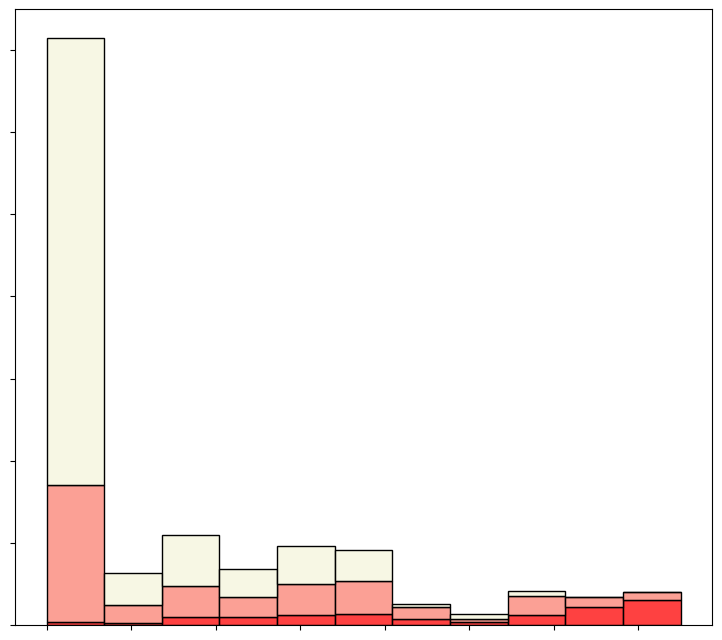

In [27]:
# Use clincial diagnostic categories as a rough way to assess the success of the model's stage assignments
color_palette = {
    'Dementia': '#FE0101',  # Deep red
    'MCI': '#FA8072',  # Salmon
    'CN': '#F5F5DC'}   # Beige (light beige)
    
if nsubtypes < 2: # If only one subtype
    plt.figure(figsize=(9, 8))
    ax = sns.histplot(data=zdata, x='ml_stage', color = 'red', palette=color_palette, hue='Diagnosis', multiple='stack',legend=False)

    # Adjust the legend
    # legend = ax.get_legend()
    # legend.set_title('Diagnosis')
    # plt.setp(legend.get_title(), fontsize='30')  # for legend title
    # plt.setp(legend.get_texts(), fontsize='25')  # for legend text

    # Remove axis labels
    ax.set(xlabel=None, ylabel=None)
    # Remove title (if any)
    ax.set_title('')
    ax.set_xticklabels([])  # Hide x-axis tick labels but keep the tick marks
    ax.set_yticklabels([])  # Hide y-axis tick labels but keep the tick marks
    plt.show()
else:  # If multiple subtypes
    sns.displot(data=zdata, x='ml_stage', hue='Diagnosis', col='ml_subtype', kind='hist', multiple='stack')
    plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


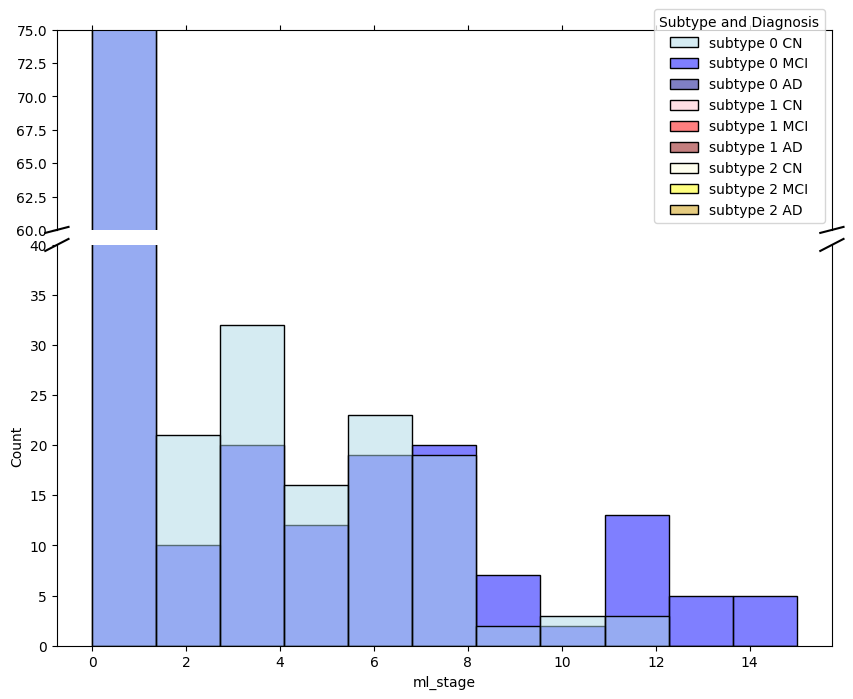

In [9]:
# Joint plot

zdata['ml_subtype'] = zdata['ml_subtype'].astype(int)
zdata['Subtype and Diagnosis'] = 'subtype ' + zdata['ml_subtype'].astype(str) + ' ' + zdata['Diagnosis'].astype(str)

# Define your palette
palette = {
    "subtype 0 CN": "lightblue", "subtype 0 MCI": "blue", "subtype 0 AD": "darkblue",  # Subtype 0
    "subtype 1 CN": "pink", "subtype 1 MCI": "red", "subtype 1 AD": "#8B0000",  # Subtype 1
    "subtype 2 CN": "lightyellow", "subtype 2 MCI": "#FFFF00", "subtype 2 AD": "#CC9900"  # Subtype 2
}

hue_order = [
    "subtype 0 CN", "subtype 0 MCI", "subtype 0 AD",
    "subtype 1 CN", "subtype 1 MCI", "subtype 1 AD",
    "subtype 2 CN", "subtype 2 MCI", "subtype 2 AD"
]

# Create figure and subplots for broken y-axis effect
fig, (ax_top, ax_bottom) = plt.subplots(2, 1, sharex=True, figsize=(10, 8),
                                        gridspec_kw={'height_ratios': [1, 2], 'hspace': 0.05})

# Top histogram (for larger values or to hide)
sns.histplot(data=zdata, x="ml_stage", hue="Subtype and Diagnosis", palette=palette, hue_order=hue_order, ax=ax_top)
ax_top.set_ylim(60, 75)  # Adjust based on your data
ax_top.spines['bottom'].set_visible(False)
ax_top.xaxis.tick_top()
ax_top.tick_params(labeltop=False)  # Hide top tick labels

# Bottom histogram (for the rest of the data)
sns.histplot(data=zdata, x="ml_stage", hue="Subtype and Diagnosis", palette=palette, hue_order=hue_order, ax=ax_bottom)
ax_bottom.set_ylim(0, 40)  # Adjust based on your data
ax_bottom.spines['top'].set_visible(False)

# Add diagonal lines to indicate the break in the y-axis
d = .015  # Size of diagonal lines
kwargs = dict(transform=ax_top.transAxes, color='k', clip_on=False)
ax_top.plot((-d, +d), (-d, +d), **kwargs)        # Top-left diagonal
ax_top.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # Top-right diagonal

kwargs.update(transform=ax_bottom.transAxes)  # Switch to bottom axes
ax_bottom.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # Bottom-left diagonal
ax_bottom.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # Bottom-right diagonal

# Formatting
ax_top.set_ylabel('')  # This sets the y-axis label to an empty string for the top plot
ax_bottom.legend().remove()

plt.show()

# Trajectory plots for each biomarker

In [28]:
# store our biomarker labels as a variable
biomarkers = zdata.columns[[3,4,6,10,11]]
print(biomarkers)

Index(['ADAS11_bl', 'Average_hippo', 'ctx_entorhinal_tau', 'Hippocampus_tau',
       'Amygdala_tau'],
      dtype='object')


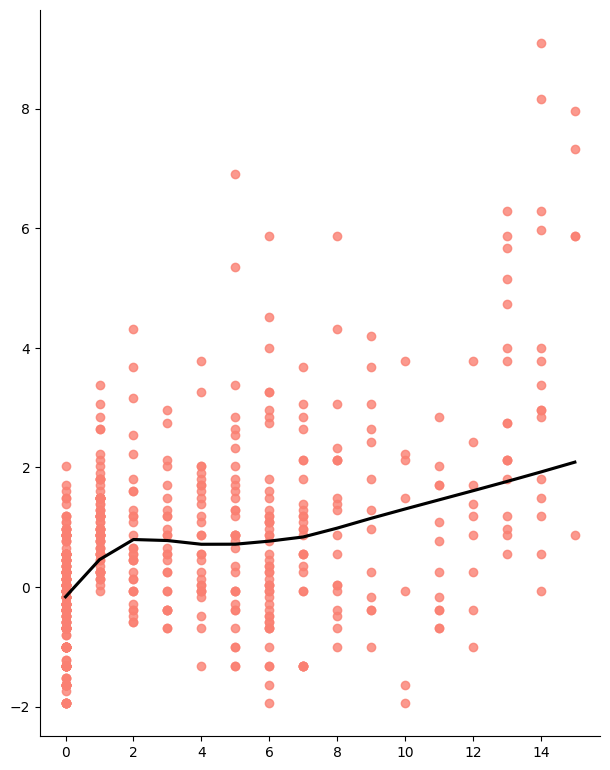

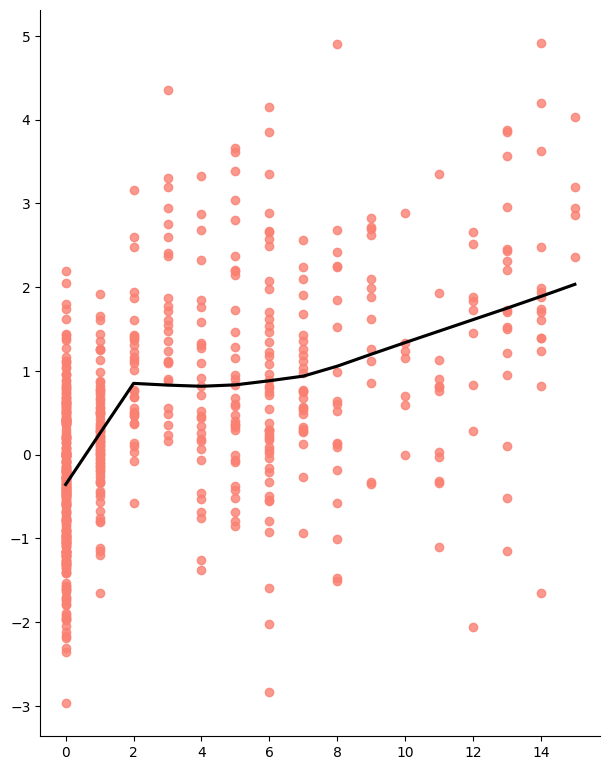

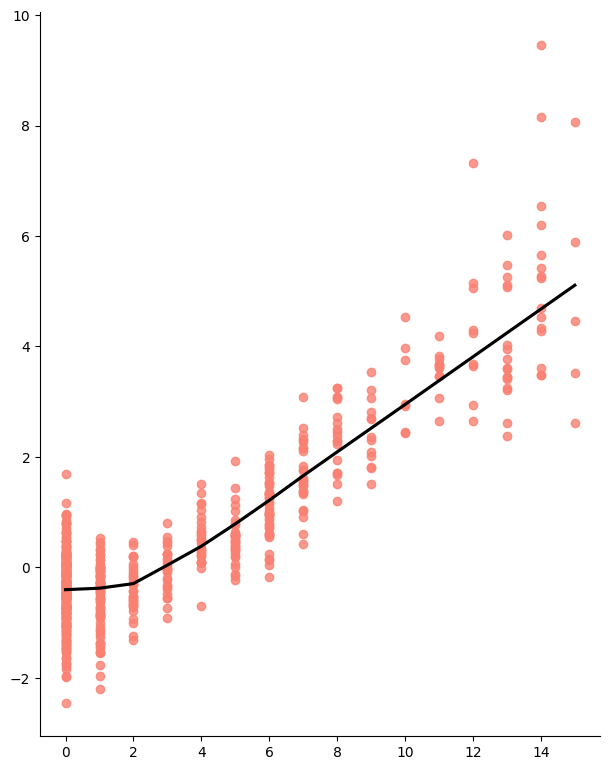

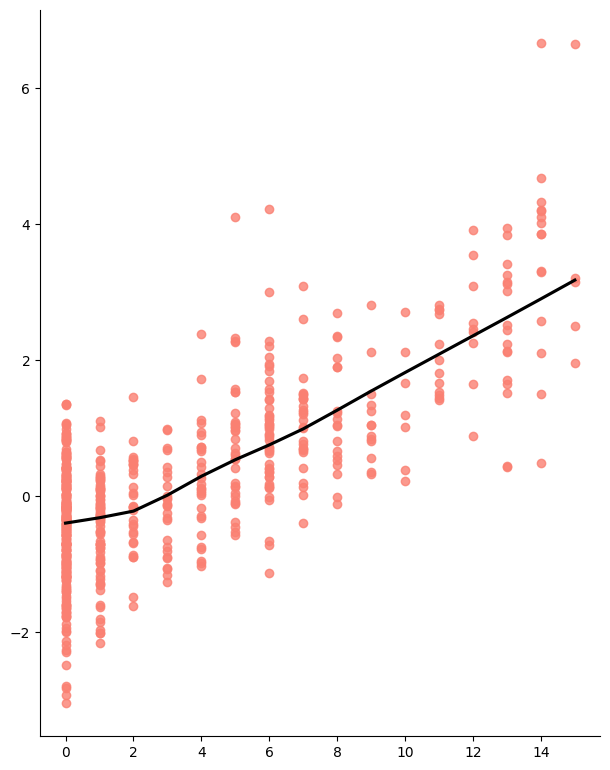

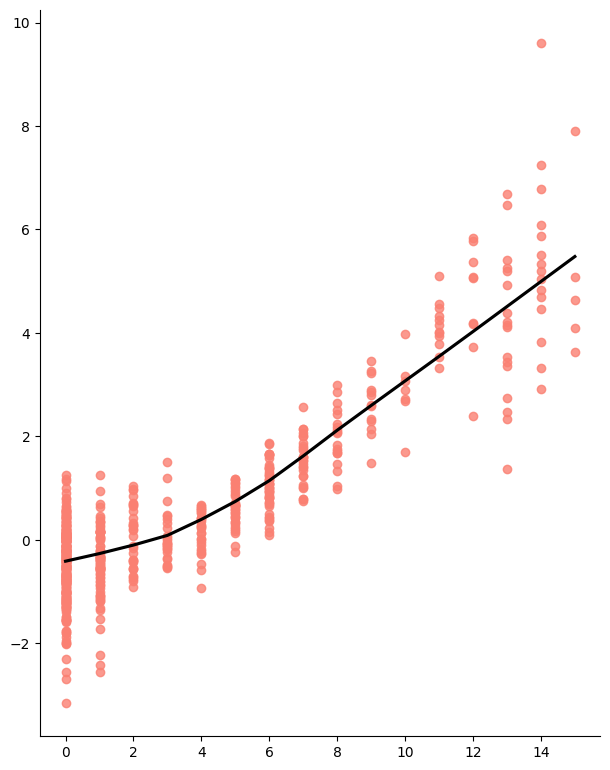

In [29]:
y_min = zdata[biomarkers].min().min()  # Global minimum across all biomarkers
y_max = zdata[biomarkers].max().max()  # Global maximum across all biomarkers

if nsubtypes < 2: # If only one subtype
    
    for biomarker in biomarkers:
        
        # plot relationship between each biomarker and stage for each subject
        sns.lmplot(x='ml_stage',y=biomarker, data = zdata,lowess=True,
                line_kws={'color': 'black', 'alpha': 1.0},  # Ensuring full opacity
                scatter_kws={'color': '#FA8072'}, height=8,  # height in inches of each facet
                aspect=0.8)
        
        # Get current axis (gca) object
        ax = plt.gca()

        # Remove x and y axis labels
        #ax.set_xticklabels([])  # Hide x-axis tick labels but keep the tick marks
        #ax.set_yticklabels([])  # Hide y-axis tick labels but keep the tick marks
        ax.set_xlabel('')  # Removing x-axis label if there is one
        ax.set_ylabel('')  # Removing y-axis label if there is one

        # Add a title to the plot
        #plt.gcf().suptitle(biomarker, fontsize=14) 

        # Set the same y-axis range for all plots
        #plt.ylim(y_min, y_max)

        plt.show()
    
else: # If multiple subtypes

    for biomarker in biomarkers:
        # Plot relationship between each biomarker and stage for all subtypes together
        sns.lmplot(x='ml_stage', y=biomarker, hue='ml_subtype', data=zdata, lowess=True, aspect=1.5)

        # Add a title to the plot
        plt.title(f'{biomarker} Across Subtypes', fontsize=14)

        # Set the same y-axis range for all plots
        plt.ylim(y_min, y_max)

        plt.show()

# Calculate y_k at each stage for a biomarker
Can use this code for any biomarker, including tau regional values and functional metrics. 

In [30]:
# Load data for biomarker of interest 
data = pandas.read_csv('Cog_Tau_V1.csv')
#data = pandas.read_csv('FinalEBM_input.csv')

#Housekeeping
data = data.drop(['Unnamed: 0'], axis=1)
data = data.rename(columns ={'merge_RID' : 'RID'})

# Delete RIDs with NaN values in any column (only run for 'Cog_Tau_V1.csv') and redundant RIDS
indices_to_drop = [97,105, 238, 250, 388, 400, 439, 454, 734, 778]
data = data.drop(indices_to_drop, axis=0)
data = data.drop_duplicates(subset='RID', keep='first')

# Delete redundant RIDs (when working with non-longitudinal data)
# #data = data.drop_duplicates(subset='RID', keep='first')

# Find the average of the right and left cerebellum 
data['Average_Cerebellum'] = (data['Left-Cerebellum-Cortex']+ data['Right-Cerebellum-Cortex'])/2

# Divide each regional tau value by the average of R and L cerebellum tau and subtract 1
data.iloc[:, 6:] = data.iloc[:, 6:].div(data['Average_Cerebellum'], axis=0) - 1

data = data.drop('Average_Cerebellum', axis=1)

# extract data for control subjects
data_control = data[data['merge_DX'] == 'CN']

# z-score
for col in data.columns[7:]:  
    
    # compute the mean and standard deviation of the control population
    mean_control = data_control[[col]].mean()
    std_control = data_control[[col]].std()

    # z-score the data
    data[[col]] = (data[[col]]-mean_control)/std_control

#If multiple subtypes
if nsubtypes > 1:

    # Create dictionaries of zdata, RIDS, data, and indices for each subtype
    zdata_dicts = {}
    RIDS_dicts = {}
    data_dicts = {}
    indices_dicts = {}

    # Fill in dictionaries for each subtype
    for subtype in range(1,nsubtypes + 1):

        key = subtype
        zdata_dicts[key] = zdata[zdata['ml_subtype'] == subtype]
    
        key_rids = subtype
        RIDS_dicts[key_rids] = zdata_dicts[key]['RID']
    
        key_data = subtype
        data_dicts[key_data] = data[data['RID'].isin(RIDS_dicts[key_rids])]
    
        key_indices = subtype
        indices_dicts[key_indices] = zdata[zdata['RID'].isin(RIDS_dicts[key_rids])].index

In [11]:
# Create a data frame for the stage probability distributions for each subject from pickle file
prob_stage = pandas.DataFrame(pk['prob_stage'])

# Define the number of stages 
stage_count = prob_stage.shape[1]

# Define biomarker of interest
biomarker_of_interest = 'Right-Amygdala' # INPUT BIOMARKER OF INTEREST HERE exactly as it appears in column title

if nsubtypes > 1:

    prob_stage_dicts = {}
    biomarker_values_dicts = {}
    
    for subtype in range(1,nsubtypes + 1):

        prob_stage_dicts[subtype] = prob_stage.loc[indices_dicts[subtype]]
        
        # Extract the biomarker data for the current subtype
        biomarker_data = data_dicts[subtype][biomarker_of_interest]

        #Initialize list of y(k) values for each stage k within biomarkers_values dictionary 
        biomarker_values_dicts[subtype] = []

        for k in range(int(stage_count)): # For each stage k
            sum = 0 # Define a variable for sum of all subjects i (numerator)

            for i in range(len(biomarker_data)): # For each subject i 
        
                prob = prob_stage_dicts[subtype].iloc[i, k] # Define the probability that subject i is in stage k
                value = biomarker_data.iloc[i] # Define the value of the biomarker for subject i 
                product = prob * value # Multiply 
                sum = sum + product # Add the product of the biomarker value and stage probability to the sum of i for stage k

            column_sum = np.sum(prob_stage.iloc[:, k]) # (denominator) 

            final_value = sum / column_sum # Normalize with sum of probabilities for each subject in stage k
    
            biomarker_values_dicts[subtype].append(final_value) # Save sum to biomarker_values list

        # Print list of y(k) values (each value in list corresponds to a stage k)
        print('Subtype ' + str(subtype) + ' biomarker values: ' + str(biomarker_values_dicts[subtype]))
        
else:
    
    # Define biomarker of interest as an array dimensions 1 x i where i is the number of subjects
    biomarker_data = data[biomarker_of_interest]

    #Initialize list of y(k) values for each stage k
    biomarker_values = []
    #Initialize list of the variance for each stage k
    variance_values = []

    for k in range(int(stage_count)): # For each stage k
        total = 0 # Define a variable for sum of all subjects i (numerator)

        for i in range(len(biomarker_data)): # For each subject i 
            prob = prob_stage.iloc[i, k] # Define the probability that subject i is in stage k 
            value = biomarker_data.iloc[i] # Define the value of the biomarker for subject i 
            product = prob * value # Multiply 
            total = total + product # Add the product of the biomarker value and stage probability to the sum of i for stage k

        column_sum = np.sum(prob_stage.iloc[:, k]) # (denominator) 
        mean = total / column_sum # Normalize with sum of probabilities for each subject in stage k
        biomarker_values.append(mean) # Save mean to biomarker_values list

        variance = 0 # Define variance for stage k
        
        for i in range(len(biomarker_data)): # For each subject i 
            prob = prob_stage.iloc[i, k] 
            value = biomarker_data.iloc[i] 
            variance_individual = prob * (value - mean) ** 2
            variance = variance + variance_individual 

        variance = variance / len(biomarker_data) # Normalize
        variance = math.sqrt(variance) # Take the square root
        
        variance_values.append(variance) # Save variance to list for stage k

    # Print list of y(k) values (each value in list corresponds to a stage k)
    print('Biomarker values: ' + str(biomarker_values))
    print('Variance values: ' + str(variance_values))

Biomarker values: [0.3881440183965505, 0.4044215704317663, 0.42526567046864266, 0.43931832229787193, 0.4524327985305676, 0.48005859318188127, 0.5195115960850077, 0.5652381838568927, 0.7195129144182039, 0.9365429492529421, 1.1373932173262307, 1.2458856657619972, 1.058973742903188, 0.8006962400103347, 1.137666088419085, 2.867203415726256]
Variance values: [0.6745380548307846, 0.6120038782473686, 0.5651394636877434, 0.5154591660326644, 0.46433612146935477, 0.4133652006658647, 0.3530092242655133, 0.2932729633143646, 0.2693704590039971, 0.26919571047590934, 0.2812777734965476, 0.3028345854555984, 0.3012965494529156, 0.3009596888899281, 0.3882402315927437, 0.3766725436399378]


# Gaussian Interpolation 
Create and plot a continuous time series from discrete y_k values for biomarker of interest

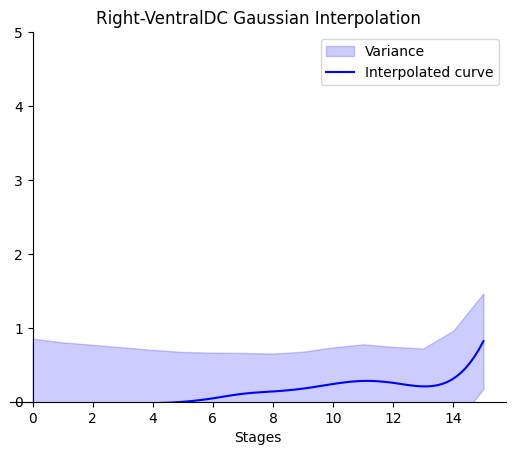

In [31]:
# With scipy.interpolate.interp1d
# EDIT LATER TO SPECIFY SIGNMOIDAL RELATIONSHIP BETWEEN TIME AND STAGE 

if nsubtypes > 1:

     for subtype in range(1,nsubtypes + 1):

        x = np.linspace(0, stage_count - 1,stage_count) 
        y = biomarker_values_dicts[subtype]

        # Perform interpolation 
        f = interp1d(x, y, kind='cubic')

        # New x values for which we want to interpolate
        xnew = np.linspace(0,stage_count - 1,100) 

        # Interpolate y values for the new x values
        ynew = f(xnew)

        # Plotting
        plt.plot(x, y, 'o', label='Original data')
        plt.plot(xnew, ynew, '-', label='Interpolated curve')
        plt.legend()
        plt.xlabel('Stages')
        plt.title('Subtype ' + str(subtype) + ' ' + biomarker_of_interest + ' Gaussian Interpolation')
        plt.show()

else:

    x = np.linspace(0, stage_count - 1,stage_count) 
    y = biomarker_values 
    variance = variance_values

    # Perform interpolation 
    f = interp1d(x, y, kind='cubic')

    # New x values for which we want to interpolate
    xnew = np.linspace(0,stage_count - 1,100) 

    # Interpolate y values for the new x values
    ynew = f(xnew)

    # Create a shaded area for the error
    upper = y + np.sqrt(variance)
    lower = y - np.sqrt(variance)

    # Plotting
    plt.fill_between(x, lower, upper, color='blue', alpha=0.2, label='Variance')
    plt.plot(xnew, ynew, '-', color = 'blue', label='Interpolated curve')
    plt.legend()
    plt.xlabel('Stages')
    plt.title(biomarker_of_interest + ' Gaussian Interpolation')
    
    # Remove tick labels
    ax = plt.gca()  # Get the current axes
    ax.set_ylim(bottom=0, top=5)
    #ax.set_xticklabels([])  # Remove x-axis tick labels but keep the tick marks
    #ax.set_yticklabels([])  # Remove y-axis tick labels but keep the tick marks

    # Move left spine to zero of x-axis
    ax.spines['left'].set_position('zero')
    ax.spines['right'].set_color('none')  # Eliminate right spine
    ax.spines['bottom'].set_position('zero')
    ax.spines['top'].set_color('none')  # Eliminate top spine

    # Plotting error bars and dots
    #plt.plot(x, y, 'o', label='Original data')
    #plt.errorbar(x, y, yerr=np.sqrt(variance), fmt='o', label='Original data with error bars')

(0.0, 5.0)

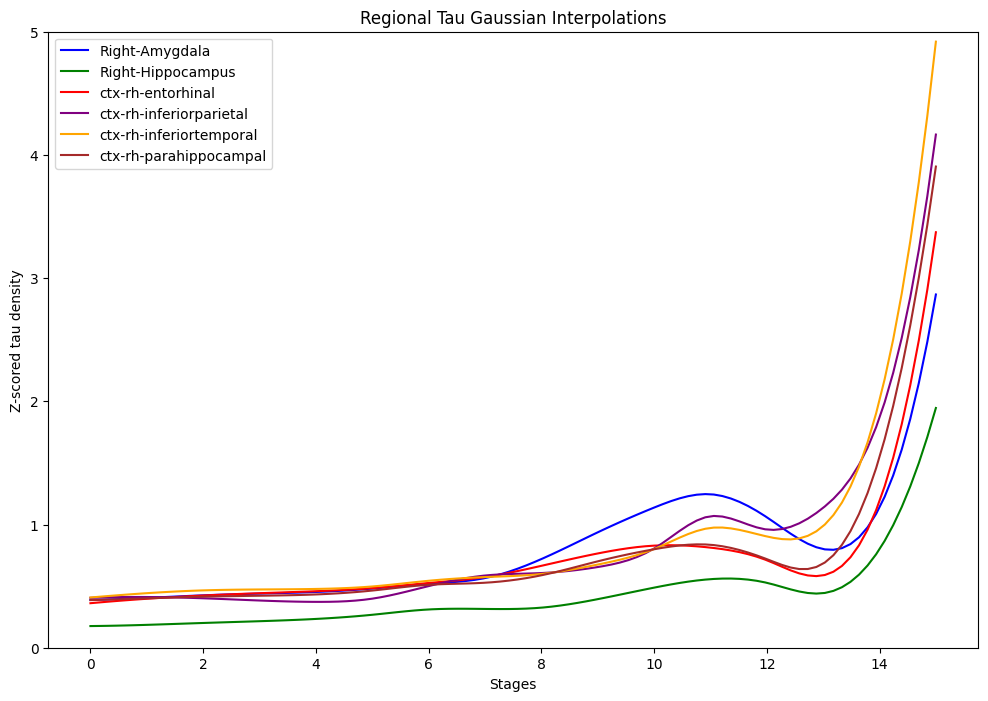

In [32]:
# TEMPORARY

# Create a data frame for the stage probability distributions for each subject from pickle file
prob_stage = pandas.DataFrame(pk['prob_stage'])

# Define the number of stages 
stage_count = prob_stage.shape[1]

# Define biomarkers of interest
biomarkers_of_interest = [
    'Right-Amygdala', 'Right-Hippocampus', 'ctx-rh-entorhinal', 'ctx-rh-inferiorparietal', 'ctx-rh-inferiortemporal', 'ctx-rh-parahippocampal'
]

# Set up the plot
plt.figure(figsize=(12, 8))
colors = ['blue', 'green', 'red', 'purple', 'orange', 'brown']  # Define different colors for each biomarker

for biomarker, color in zip(biomarkers_of_interest, colors): 
    # Define biomarker data as an array dimensions 1 x i where i is the number of subjects
    biomarker_data = data[biomarker]

    # Initialize lists of y(k) values and variance for each stage k
    biomarker_values = []
    variance_values = []

    for k in range(int(stage_count)):  # For each stage k
        total = 0  # Define a variable for the sum of all subjects i (numerator)

        for i in range(len(biomarker_data)):  # For each subject i 
            prob = prob_stage.iloc[i, k]  # Define the probability that subject i is in stage k 
            value = biomarker_data.iloc[i]  # Define the value of the biomarker for subject i 
            product = prob * value  # Multiply 
            total = total + product  # Add the product of the biomarker value and stage probability to the sum of i for stage k

        column_sum = np.sum(prob_stage.iloc[:, k])  # (denominator) 
        mean = total / column_sum  # Normalize with the sum of probabilities for each subject in stage k
        biomarker_values.append(mean)  # Save mean to biomarker_values list

        variance = 0  # Define variance for stage k
        
        for i in range(len(biomarker_data)):  # For each subject i 
            prob = prob_stage.iloc[i, k] 
            value = biomarker_data.iloc[i] 
            variance_individual = prob * (value - mean) ** 2
            variance = variance + variance_individual 

        variance = variance / len(biomarker_data)  # Normalize
        variance = math.sqrt(variance)  # Take the square root
        
        variance_values.append(variance)  # Save variance to list for stage k

    x = np.linspace(0, stage_count - 1, stage_count) 
    y = biomarker_values 
    variance = variance_values

    # Perform interpolation 
    f = interp1d(x, y, kind='cubic')

    # New x values for which we want to interpolate
    xnew = np.linspace(0, stage_count - 1, 100) 

    # Interpolate y values for the new x values
    ynew = f(xnew)

    # Create a shaded area for the error
    #upper = y + np.sqrt(variance)
    #lower = y - np.sqrt(variance)

    # Plotting
    #plt.fill_between(x, lower, upper, color=color, alpha=0.2)
    plt.plot(xnew, ynew, '-', color=color, label=biomarker)

# Add legend, labels, and title
plt.legend()
plt.xlabel('Stages')
plt.ylabel('Z-scored tau density')
plt.title('Regional Tau Gaussian Interpolations')
plt.ylim(bottom=0, top=5)

# Display the plot


NameError: name 'ax1' is not defined

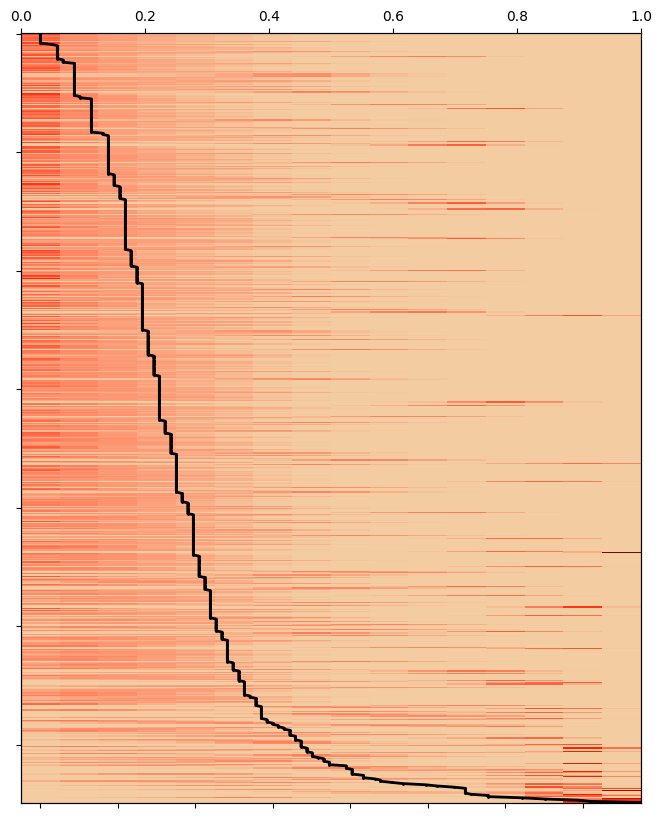

In [33]:
# Alternate probability heatmap for cognitive score order with overlay 

# Add diagnosis, cognitive score, and ml_stage to data frame
prob_stage_plot = pandas.merge(zdata,prob_stage,left_index=True, right_index=True)
prob_stage_plot = prob_stage_plot.iloc[:,[1, 3, 22] + list(range(24, prob_stage_plot.shape[1]))]

# Define your custom colormap
colors = [
    "#f4cca1",  # beige
    "#ff8c69",  # light salmon (intermediate color for smoother transition)
    "#ff5533",  # tomato red (stronger red)
    "#ff2200",  # orange red (more intense)
    "#760909"   # red (most intense)
]
custom_red_colormap = LinearSegmentedColormap.from_list("custom_red", colors)

# By cognitive score
by_cog = prob_stage_plot.sort_values(by='ADAS11_bl')
# Normalize ADAS11_bl scores to the range of indices used in the x-axis of the heatmap
normalized_ADAS11 = (by_cog['ADAS11_bl'] - by_cog['ADAS11_bl'].min()) / (by_cog['ADAS11_bl'].max() - by_cog['ADAS11_bl'].min())
scaled_ADAS11_x = normalized_ADAS11 * (by_cog.shape[1] - 3.5)  # Scale to width of heatmap
by_cog = by_cog.iloc[:,3:]
plt.figure(figsize=(8,10))
plt.imshow(by_cog, cmap=custom_red_colormap, interpolation='none', aspect='auto')
# Generate y-values for the line plot (assuming a simple sequential order, you may adjust as needed)
y_values = np.arange(by_cog.shape[0])
# Overlay the line representing the ADAS11 score for each subject
plt.plot(scaled_ADAS11_x, y_values, color='black', marker='o', linestyle='-', linewidth=2, markersize=1, label='ADAS11 Score Line')
ax = plt.gca()  # Get the current axes
ax.set_xticklabels([])  # Remove x-axis tick labels but keep the tick marks
ax.set_yticklabels([])  # Remove y-axis tick labels but keep the tick marks

# Create a secondary x-axis
ax2 = plt.twiny()
# Define new x-ticks for the secondary x-axis. Ensure they align with primary axis
new_tick_positions = [-2, 1, 4, 7, 10, 13]  # Specify positions where you want ticks

# Set the ticks and labels for the secondary x-axis
ax2.set_xlim(ax1.get_xlim())  # Ensure alignment with primary x-axis
ax2.set_xticks(new_tick_positions)  # Set the ticks at desired positions

# Provide labels for these tick positions
#ax2.set_xticklabels(['-2', '0', '2', '4', '6', '8'])  # Corresponding labels for each tick
ax2.set_xticklabels([])

# Add a label to the secondary x-axis
#ax2.set_xlabel('ADAS11')

# Customize the plot
#plt.xlabel('Stage')
plt.ylabel('Subjects')
#plt.title('Heatmap with ADAS11 Score Overlay')
#plt.legend()
plt.show()

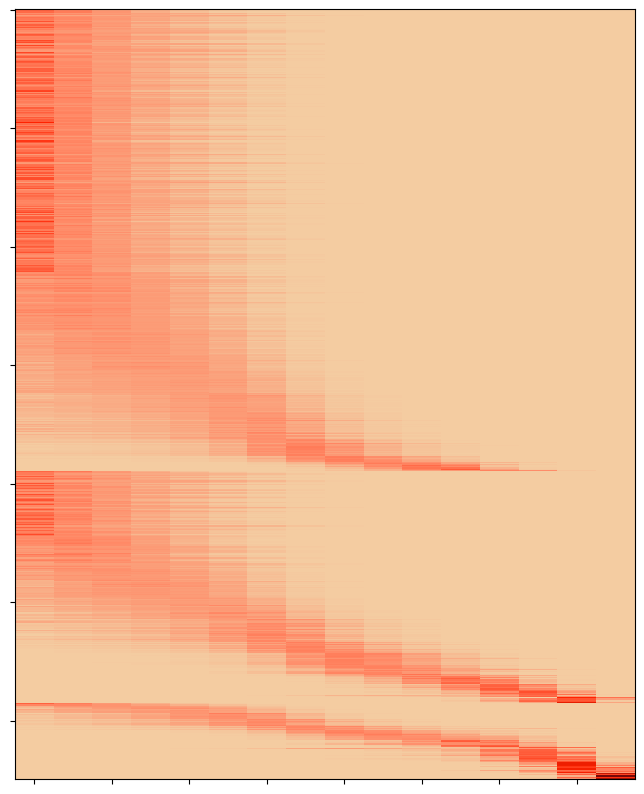

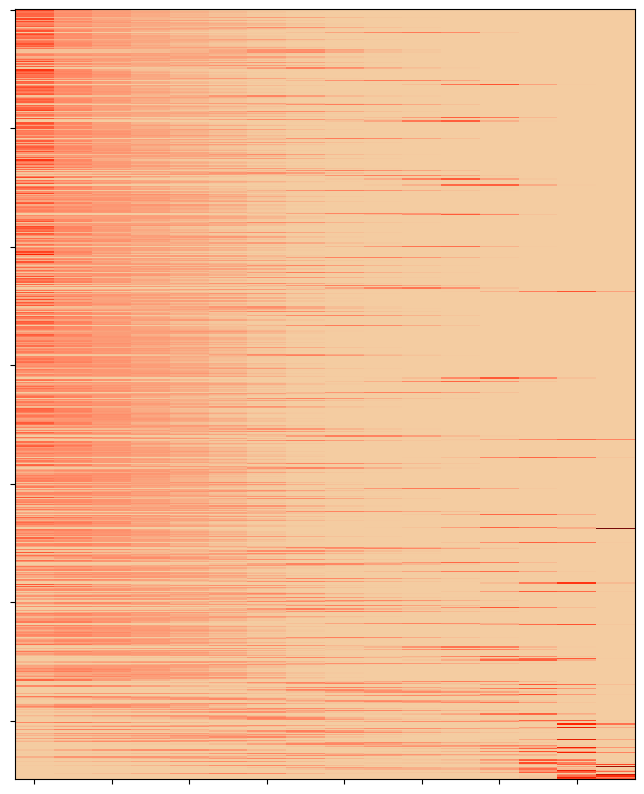

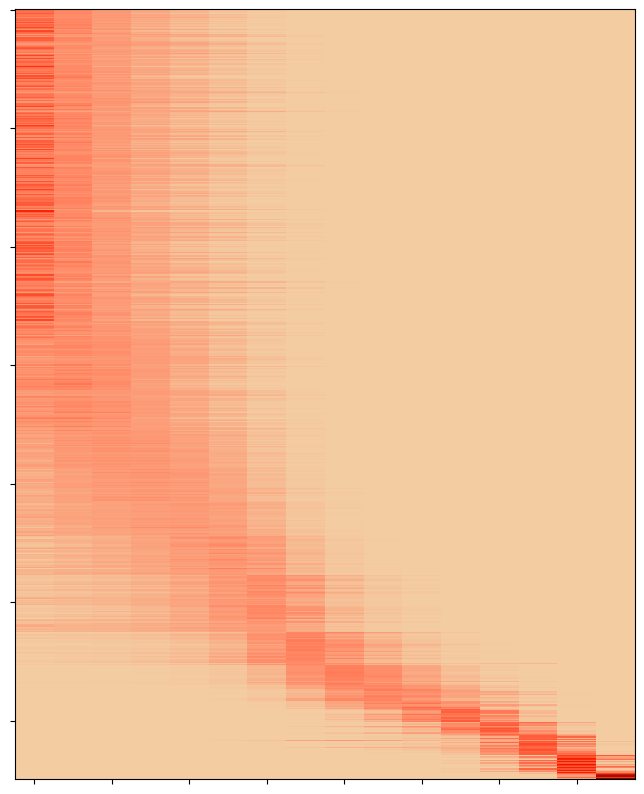

In [363]:
# Plot probability stage matrix

# Add diagnosis, cognitive score, and ml_stage to data frame
prob_stage_plot = pandas.merge(zdata,prob_stage,left_index=True, right_index=True)
prob_stage_plot = prob_stage_plot.iloc[:,[1, 3, 22] + list(range(24, prob_stage_plot.shape[1]))]

# Define your custom colormap
colors = [
    "#f4cca1",  # beige
    "#ff8c69",  # light salmon (intermediate color for smoother transition)
    "#ff5533",  # tomato red (stronger red)
    "#ff2200",  # orange red (more intense)
    "#760909"   # red (most intense)
]
custom_red_colormap = LinearSegmentedColormap.from_list("custom_red", colors)

# Plotting by diagnosis
CN = prob_stage_plot[prob_stage_plot['Diagnosis'] == 'CN']
MCI = prob_stage_plot[prob_stage_plot['Diagnosis'] == 'MCI']
AD = prob_stage_plot[prob_stage_plot['Diagnosis'] == 'Dementia']
CN_by_stage = CN.sort_values(by='ml_stage')
MCI_by_stage = MCI.sort_values(by='ml_stage')
AD_by_stage = AD.sort_values(by='ml_stage')
by_diagnosis = pandas.concat([CN_by_stage, MCI_by_stage, AD_by_stage], ignore_index=True)
by_diagnosis = by_diagnosis.iloc[:,3:]
plt.figure(figsize=(8, 10))
plt.imshow(by_diagnosis, cmap=custom_red_colormap, interpolation='none', aspect='auto')
ax = plt.gca()  # Get the current axes
ax.set_xticklabels([])  # Remove x-axis tick labels but keep the tick marks
ax.set_yticklabels([])  # Remove y-axis tick labels but keep the tick marks
plt.show()

# By cognitive score
by_cog = prob_stage_plot.sort_values(by='ADAS11_bl')
by_cog = by_cog.iloc[:,3:]
plt.figure(figsize=(8, 10))
plt.imshow(by_cog, cmap=custom_red_colormap, interpolation='none', aspect='auto')
ax = plt.gca()  # Get the current axes
ax.set_xticklabels([])  # Remove x-axis tick labels but keep the tick marks
ax.set_yticklabels([])  # Remove y-axis tick labels but keep the tick marks


# By most likely stage 
by_stage = prob_stage_plot.sort_values(by='ml_stage')
by_stage = by_stage.iloc[:,3:]
plt.figure(figsize=(8, 10))
plt.imshow(by_stage, cmap=custom_red_colormap, interpolation='none', aspect='auto')
ax = plt.gca()  # Get the current axes
ax.set_xticklabels([])  # Remove x-axis tick labels but keep the tick marks
ax.set_yticklabels([])  # Remove y-axis tick labels but keep the tick marks



plt.show()

# Calculate a continous time series for a biomarker in every brain region
Perform the above operations for every brain region (currently looking at tau)

In [34]:
# Now let's calculate an interpolation for tau in every region 

column_labels = ['ctx-rh-bankssts', 'ctx-rh-caudalanteriorcingulate','ctx-rh-caudalmiddlefrontal','ctx-rh-cuneus','ctx-rh-entorhinal','ctx-rh-fusiform','ctx-rh-inferiorparietal','ctx-rh-inferiortemporal','ctx-rh-isthmuscingulate','ctx-rh-lateraloccipital','ctx-rh-lateralorbitofrontal','ctx-rh-lingual','ctx-rh-medialorbitofrontal','ctx-rh-middletemporal','ctx-rh-parahippocampal','ctx-rh-paracentral','ctx-rh-parsopercularis','ctx-rh-parsorbitalis','ctx-rh-parstriangularis','ctx-rh-pericalcarine','ctx-rh-postcentral','ctx-rh-posteriorcingulate','ctx-rh-precentral','ctx-rh-precuneus','ctx-rh-rostralanteriorcingulate','ctx-rh-rostralmiddlefrontal','ctx-rh-superiorfrontal','ctx-rh-superiorparietal','ctx-rh-superiortemporal','ctx-rh-supramarginal','ctx-rh-frontalpole','ctx-rh-temporalpole','ctx-rh-transversetemporal','ctx-rh-insula','ctx-lh-bankssts','ctx-lh-caudalanteriorcingulate','ctx-lh-caudalmiddlefrontal','ctx-lh-cuneus','ctx-lh-entorhinal','ctx-lh-fusiform','ctx-lh-inferiorparietal','ctx-lh-inferiortemporal','ctx-lh-isthmuscingulate','ctx-lh-lateraloccipital','ctx-lh-lateralorbitofrontal','ctx-lh-lingual','ctx-lh-medialorbitofrontal','ctx-lh-middletemporal','ctx-lh-parahippocampal','ctx-lh-paracentral','ctx-lh-parsopercularis','ctx-lh-parsorbitalis','ctx-lh-parstriangularis','ctx-lh-pericalcarine','ctx-lh-postcentral','ctx-lh-posteriorcingulate','ctx-lh-precentral','ctx-lh-precuneus','ctx-lh-rostralanteriorcingulate','ctx-lh-rostralmiddlefrontal','ctx-lh-superiorfrontal','ctx-lh-superiorparietal','ctx-lh-superiortemporal','ctx-lh-supramarginal','ctx-lh-frontalpole','ctx-lh-temporalpole','ctx-lh-transversetemporal','ctx-lh-insula','Left-Cerebellum-Cortex','Left-Thalamus-Proper','Left-Caudate','Left-Putamen','Left-Pallidum','Left-Hippocampus','Left-Amygdala','Left-Accumbens-area','Left-VentralDC','Right-Cerebellum-Cortex','Right-Thalamus-Proper','Right-Caudate','Right-Putamen','Right-Pallidum','Right-Hippocampus','Right-Amygdala','Right-Accumbens-area','Right-VentralDC']

if nsubtypes > 1:

    tau_array_dicts = {}
    tau_df_dicts = {}

    for subtype in range(1,nsubtypes + 1):

        tau_array_dicts[subtype] = None
         
        for region in data_dicts[subtype].columns[6:]: # Loop through tau in every region 

            # Define biomarker of interest as an array dimensions 1 x i where i is the number of subjects
            biomarker_of_interest = region  
            
            # Extract the biomarker data for the current subtype
            biomarker_data = data_dicts[subtype][biomarker_of_interest]

            #Initialize list of y(k) values for each stage k within biomarkers_values dictionary 
            biomarker_values_dicts[subtype] = []

            for k in range(int(stage_count)): # For each stage k
                sum = 0 # Define a variable for sum of all subjects i (numerator)

                for i in range(len(biomarker_data)): # For each subject i 
        
                    prob = prob_stage_dicts[subtype].iloc[i, k] # Define the probability that subject i is in stage k
                    value = biomarker_data.iloc[i] # Define the value of the biomarker for subject i 
                    product = prob * value # Multiply 
                    sum = sum + product # Add the product of the biomarker value and stage probability to the sum of i for stage k

                column_sum = np.sum(prob_stage.iloc[:, k]) # (denominator) 

                final_value = sum / column_sum # Normalize with sum of probabilities for each subject in stage k
    
                biomarker_values_dicts[subtype].append(final_value) # Save sum to biomarker_values list

            x = np.linspace(0, stage_count - 1,stage_count) 
            y = biomarker_values_dicts[subtype]

            # Perform interpolation 
            f = interp1d(x, y, kind='cubic')

            # New x values for which we want to interpolate
            xnew = np.linspace(0,stage_count - 1,100) 

            # Interpolate y values for the new x values
            ynew = f(xnew)

            if tau_array_dicts[subtype] is None:
                tau_array_dicts[subtype] = ynew[np.newaxis, :]  # Make ynew 2D for vertical stacking
            else:
                tau_array_dicts[subtype] = np.vstack((tau_array_dicts[subtype], ynew))
        
        print('Subtype ' + str(subtype) + ' regional tau: ' + str(tau_array_dicts[subtype]))

        # Convert tau array to labeled data frame and save to csv
        transpose_array = tau_array_dicts[subtype].T

        tau_df_dicts[subtype] = pandas.DataFrame(data=transpose_array, columns = column_labels)

else: 

    # Define an array for tau interpolations in every brain region
    tau_array = None
    
    for region in data.columns[6:]: # Loop through tau in every region 
    
        # Define biomarker of interest as an array dimensions 1 x i where i is the number of subjects
        biomarker_of_interest = region  
        biomarker_data = data[biomarker_of_interest] 

        # Initialize list of y(k) values for each stage k
        biomarker_values = []
    
        for k in range(int(stage_count)): # For each stage k
            sum = 0 # Define a variable for sum of all subjects i (numerator)
    
            for i in range(len(zdata)): # For each subject i 
        
                prob = prob_stage.iloc[i, k] # Define the probability that subject i is in stage k 
                value = biomarker_data.iloc[i] # Define the value of the biomarker for subject i 
                product = prob * value # Multiply 
                sum = sum + product # Add the product of the biomarker value and stage probability to the sum of i for stage k

            column_sum = np.sum(prob_stage.iloc[:, k]) # (denominator) 

            final_value = sum / column_sum # Normalize with sum of probabilities for each subject in stage k
    
            biomarker_values.append(final_value) # Save sum to biomarker_values list

    
        # Perform Gaussian interpolation with scipy.interpolate.interp1d

        x = np.linspace(0, stage_count - 1,stage_count) 
        y = biomarker_values

        # Perform interpolation 
        f = interp1d(x, y, kind='cubic')

        # New x values for which we want to interpolate
        xnew = np.linspace(0,stage_count - 1,100) 

        # Interpolate y values for the new x values
        ynew = f(xnew)

        if tau_array is None:
            tau_array = ynew[np.newaxis, :]  # Make ynew 2D for vertical stacking
        else:
            tau_array = np.vstack((tau_array, ynew))
        
    print('Regional tau: ' + str(tau_array))

    # Convert tau array to labeled data frame and save to csv
    transpose_array = tau_array.T

    column_labels = ['ctx-rh-bankssts', 'ctx-rh-caudalanteriorcingulate','ctx-rh-caudalmiddlefrontal','ctx-rh-cuneus','ctx-rh-entorhinal','ctx-rh-fusiform','ctx-rh-inferiorparietal','ctx-rh-inferiortemporal','ctx-rh-isthmuscingulate','ctx-rh-lateraloccipital','ctx-rh-lateralorbitofrontal','ctx-rh-lingual','ctx-rh-medialorbitofrontal','ctx-rh-middletemporal','ctx-rh-parahippocampal','ctx-rh-paracentral','ctx-rh-parsopercularis','ctx-rh-parsorbitalis','ctx-rh-parstriangularis','ctx-rh-pericalcarine','ctx-rh-postcentral','ctx-rh-posteriorcingulate','ctx-rh-precentral','ctx-rh-precuneus','ctx-rh-rostralanteriorcingulate','ctx-rh-rostralmiddlefrontal','ctx-rh-superiorfrontal','ctx-rh-superiorparietal','ctx-rh-superiortemporal','ctx-rh-supramarginal','ctx-rh-frontalpole','ctx-rh-temporalpole','ctx-rh-transversetemporal','ctx-rh-insula','ctx-lh-bankssts','ctx-lh-caudalanteriorcingulate','ctx-lh-caudalmiddlefrontal','ctx-lh-cuneus','ctx-lh-entorhinal','ctx-lh-fusiform','ctx-lh-inferiorparietal','ctx-lh-inferiortemporal','ctx-lh-isthmuscingulate','ctx-lh-lateraloccipital','ctx-lh-lateralorbitofrontal','ctx-lh-lingual','ctx-lh-medialorbitofrontal','ctx-lh-middletemporal','ctx-lh-parahippocampal','ctx-lh-paracentral','ctx-lh-parsopercularis','ctx-lh-parsorbitalis','ctx-lh-parstriangularis','ctx-lh-pericalcarine','ctx-lh-postcentral','ctx-lh-posteriorcingulate','ctx-lh-precentral','ctx-lh-precuneus','ctx-lh-rostralanteriorcingulate','ctx-lh-rostralmiddlefrontal','ctx-lh-superiorfrontal','ctx-lh-superiorparietal','ctx-lh-superiortemporal','ctx-lh-supramarginal','ctx-lh-frontalpole','ctx-lh-temporalpole','ctx-lh-transversetemporal','ctx-lh-insula','Left-Cerebellum-Cortex','Left-Thalamus-Proper','Left-Caudate','Left-Putamen','Left-Pallidum','Left-Hippocampus','Left-Amygdala','Left-Accumbens-area','Left-VentralDC','Right-Cerebellum-Cortex','Right-Thalamus-Proper','Right-Caudate','Right-Putamen','Right-Pallidum','Right-Hippocampus','Right-Amygdala','Right-Accumbens-area','Right-VentralDC']

    tau_df = pandas.DataFrame(data=transpose_array, columns = column_labels)
        

Regional tau: [[ 0.23079045  0.23074271  0.23066587 ...  0.53118916  0.58496021
   0.64617675]
 [ 0.03488063  0.03634039  0.03773074 ...  2.175821    2.7340987
   3.38081316]
 [ 0.35917505  0.35799162  0.35657862 ...  3.43552536  4.04325144
   4.72906358]
 ...
 [ 0.38814402  0.38971692  0.39168967 ...  2.14769302  2.48358043
   2.86720342]
 [ 0.15403228  0.15209595  0.15094075 ...  1.47891921  1.70737153
   1.96261264]
 [-0.03142683 -0.03264683 -0.03364347 ...  0.60804422  0.7066884
   0.81963179]]


In [35]:
# Exclude striatal regions

# List of striatal regions to exclude from further analysis CAN EDIT THIS
regions_to_exclude = ['Left-Pallidum','Right-Pallidum','Left-Accumbens-area','Right-Accumbens-area','Right-Putamen','Left-Putamen','Right-Caudate','Left-Caudate']

# Delete striatal regions in tau_df
tau_df_excluded = tau_df.drop(columns=regions_to_exclude)
tau_array_excluded = tau_df_excluded.to_numpy()
tau_array_excluded = tau_array_excluded.T


In [28]:
# Save data frame to csv

if nsubtypes > 1:

    for subtype in range(1,nsubtypes + 1):
    
        tau_df_dicts[subtype].to_csv(f'Regional tau time series.csv') # EDIT CSV NAME HERE

else:
    tau_df.to_csv('EBM tau time series final).csv') # EDIT CSV NAME HERE



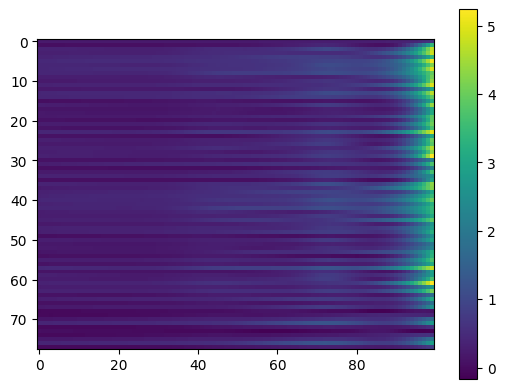

In [36]:
# Generate heatmap

if nsubtypes > 1:

    for subtype in range(1,nsubtypes + 1):

        plt.imshow(tau_array_dicts[subtype], cmap='viridis', interpolation='none')
        plt.colorbar()  # Add a color bar to map colors to values
        plt.title('Heatmap of Tau Time Series- Subtype ' + str(subtype))
        plt.show()

else:
    
    plt.imshow(tau_array_excluded, cmap='viridis', interpolation='none')
    plt.colorbar()  # Add a color bar to map colors to values
    #plt.title('Heatmap of Tau Time Series Across Regions')
    plt.show()

In [39]:
# Preparing data frame for Nexis on individual subjects

stage_data = pandas.read_csv('zdata- subtype 1 A.csv')
stage_data = stage_data[['RID', 'Diagnosis', 'ml_stage']]

# Load data for biomarker of interest 
tau_data = pandas.read_csv('Cog_Tau_V1.csv')

#Housekeeping
tau_data = tau_data.drop(['Unnamed: 0'], axis=1)
tau_data = tau_data.rename(columns ={'merge_RID' : 'RID'})

# Delete RIDs with NaN values in any column (only run for 'Cog_Tau_V1.csv') and redundant RIDS if cross-sectional 
indices_to_drop = [97,105, 238, 250, 388, 400, 439, 454, 734, 778]
tau_data = tau_data.drop(indices_to_drop, axis=0)
data = data.drop_duplicates(subset='RID', keep='first')

# Find the average of the right and left cerebellum 
tau_data['Average_Cerebellum'] = (tau_data['Left-Cerebellum-Cortex']+ tau_data['Right-Cerebellum-Cortex'])/2

# Divide each regional tau value by the average of R and L cerebellum tau and subtract 1
tau_data.iloc[:, 6:] = tau_data.iloc[:, 6:].div(tau_data['Average_Cerebellum'], axis=0) - 1

tau_data = tau_data.drop(columns=['Average_Cerebellum', 'MMSE_bl', 'ADAS11_bl', 'ADAS13_bl', 'merge_DX', 'best_DX'])

# Reset index for tau
tau_data.reset_index(drop=True, inplace=True)

final = pandas.merge(stage_data, tau_data, left_index=True, right_index=True)
final = final.rename(columns = {'RID_x': 'RID'})
final = final.drop('RID_y',axis=1)

final.to_csv('Cross-sectional stage and regional tau.csv')